In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('add_community.csv')
df.head()

,FID,Join_Count,TARGET_FID,Field1,index,CMPLNT_NUM,CMPLNT_FR_,CMPLNT_FR1,OFNS_DESC,BORO_NM,...,Y_COORD_CD,Latitude,Longitude,Lat_Lon,hour,weekday,datetime,BoroCD,Shape_Leng,Shape_Area
0,0,1,0,0,313,846207268,2017/12/31 0:00,2000/12/30 0:00,ASSAULT 3 & RELATED OFFENSES,BROOKLYN,...,176742,40.651800,-74.012345,"(40.651800177, -74.01234462)",12,SUNDAY,2017/12/31 0:00,307,87424.46794,1.041419e+08
1,1,1,1,1,553,764775390,2017/12/31 0:00,NaN,GRAND LARCENY,BRONX,...,238742,40.821953,-73.928094,"(40.821953065, -73.928094285)",1,SUNDAY,2017/12/31 0:00,204,31291.32691,5.553380e+07
2,2,1,2,2,1141,565589334,2017/12/30 0:00,NaN,ROBBERY,MANHATTAN,...,201914,40.720892,-73.988818,"(40.720891684, -73.988817939)",15,SATURDAY,2017/12/30 0:00,103,30468.36769,4.687934e+07
3,3,1,3,3,1165,610989528,2017/12/30 0:00,NaN,PETIT LARCENY,MANHATTAN,...,212676,40.750431,-73.989282,"(40.750430768, -73.989282176)",14,SATURDAY,2017/12/30 0:00,105,35288.30488,4.379030e+07
4,4,1,4,4,1167,695114551,2017/12/30 0:00,NaN,VEHICLE AND TRAFFIC LAWS,QUEENS,...,193793,40.698443,-73.808546,"(40.698442771, -73.808546403)",14,SATURDAY,2017/12/30 0:00,412,65928.41098,2.673333e+08


df = df[(df['BoroCD'] == 103) | (df['BoroCD'] == 106) | (df['BoroCD'] == 107) | (df['BoroCD'] == 108) | (df['BoroCD'] == 109) | (df['BoroCD'] == 112)]

In [3]:
df.shape

(449214, 21)

df.to_csv('man_AD.csv')

In [4]:
df.columns

Index([u'FID', u'Join_Count', u'TARGET_FID', u'Field1', u'index',
       u'CMPLNT_NUM', u'CMPLNT_FR_', u'CMPLNT_FR1', u'OFNS_DESC', u'BORO_NM',
       u'X_COORD_CD', u'Y_COORD_CD', u'Latitude', u'Longitude', u'Lat_Lon',
       u'hour', u'weekday', u'datetime', u'BoroCD', u'Shape_Leng',
       u'Shape_Area'],
      dtype='object')

In [5]:
df = df[['OFNS_DESC','hour','weekday','BoroCD']]
df.head()

,OFNS_DESC,hour,weekday,BoroCD
0,ASSAULT 3 & RELATED OFFENSES,12,SUNDAY,307
1,GRAND LARCENY,1,SUNDAY,204
2,ROBBERY,15,SATURDAY,103
3,PETIT LARCENY,14,SATURDAY,105
4,VEHICLE AND TRAFFIC LAWS,14,SATURDAY,412


In [6]:
df.columns = [['crime','hour','weekday','community']]
df.head()

,crime,hour,weekday,community
0,ASSAULT 3 & RELATED OFFENSES,12,SUNDAY,307
1,GRAND LARCENY,1,SUNDAY,204
2,ROBBERY,15,SATURDAY,103
3,PETIT LARCENY,14,SATURDAY,105
4,VEHICLE AND TRAFFIC LAWS,14,SATURDAY,412


In [7]:
df.shape

(449214, 4)

In [8]:
man = pd.read_csv('Man_cluster.csv')
del man[man.columns[0]]
man = man[['community','labels']]
man = man[man['labels'] == 1]
man = man.reset_index(drop=True)
man

,community,labels
0,103,1
1,106,1
2,107,1
3,108,1
4,109,1
5,112,1


In [9]:
df = df[(df['community'] == 103) | (df['community'] == 106) | (df['community'] == 107) | (df['community'] == 108) | (df['community'] == 109) | (df['community'] == 112)]

In [10]:
df = df.reset_index(drop=True)

In [11]:
df.head()

,crime,hour,weekday,community
0,ROBBERY,15,SATURDAY,103
1,PETIT LARCENY,13,SATURDAY,106
2,PETIT LARCENY,9,SATURDAY,103
3,CRIMINAL MISCHIEF & RELATED OF,5,SATURDAY,109
4,ASSAULT 3 & RELATED OFFENSES,4,SATURDAY,107


In [12]:
df.shape

(46297, 4)

In [13]:
len(df.crime.unique())

48

In [14]:
46000/48

958

In [15]:
filter = df.groupby('crime').count()
filter = filter[filter['hour'] > 200]
filter.head()

,hour,weekday,community
crime,,,
ASSAULT 3 & RELATED OFFENSES,4481,4481,4481
BURGLARY,1124,1124,1124
CRIMINAL MISCHIEF & RELATED OF,4832,4832,4832
CRIMINAL TRESPASS,419,419,419
DANGEROUS DRUGS,1926,1926,1926


In [16]:
df = df[df['crime'].isin(filter.index.unique())]

In [17]:
df = df.reset_index(drop=True)

In [18]:
len(df.crime.unique())

20

## Calculate percent of hour

In [19]:
df1 = df[['crime','hour']]

In [20]:
data1 = df1[df1['crime'] == df1['crime'].unique()[0]].groupby('hour').count().T
data1.index = range(0,1)
data1.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,82,72,79,48,70,46,27,22,25,29,...,52,59,59,59,60,54,67,77,70,60


In [21]:
for i in range(1,len(df1['crime'].unique())):
    DATA = df1[df1['crime'] == df1['crime'].unique()[i]].groupby('hour').count().T
    DATA.index = range(i,i+1)
    data1 = pd.concat([data1,DATA])

In [22]:
data1.index = df1['crime'].unique()

In [23]:
data1.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
ROBBERY,82,72,79,48,70,46.0,27,22,25,29,...,52,59,59,59,60,54,67,77,70,60
PETIT LARCENY,270,219,213,152,138,140.0,128,215,320,401,...,674,717,702,735,660,545,460,418,348,291
CRIMINAL MISCHIEF & RELATED OF,678,137,143,120,100,69.0,49,106,132,137,...,217,283,249,257,252,267,256,223,200,186
ASSAULT 3 & RELATED OFFENSES,203,250,214,224,179,90.0,69,90,115,123,...,179,211,227,205,241,218,250,274,249,229
FELONY ASSAULT,84,81,89,88,80,35.0,29,34,36,55,...,60,65,81,85,93,74,80,82,72,89


In [24]:
data1.shape

(20, 24)

In [25]:
data1['sum'] = data1[data1.columns[0]]

for i in range(20):
    data1.iloc[i,-1] = data1.iloc[i,:-1].sum()
    
for i in range(20):
    for j in range(24):
        data1.iloc[i,j] = data1.iloc[i,j] / data1.iloc[i,-1]       
        
data1 = data1.iloc[:,:-1]

data1.columns = 'hour_' + data1.columns.map(str)

hour = data1.copy()

hour.head()

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
ROBBERY,0.063963,0.056162,0.061622,0.037441,0.054602,0.035881,0.021061,0.017161,0.019501,0.022621,...,0.040562,0.046022,0.046022,0.046022,0.046802,0.042122,0.052262,0.060062,0.054602,0.046802
PETIT LARCENY,0.026836,0.021767,0.021171,0.015108,0.013716,0.013915,0.012722,0.021370,0.031806,0.039857,...,0.066991,0.071265,0.069774,0.073054,0.065600,0.054170,0.045721,0.041547,0.034589,0.028924
CRIMINAL MISCHIEF & RELATED OF,0.140315,0.028353,0.029594,0.024834,0.020695,0.014280,0.010141,0.021937,0.027318,0.028353,...,0.044909,0.058568,0.051531,0.053187,0.052152,0.055257,0.052980,0.046151,0.041391,0.038493
ASSAULT 3 & RELATED OFFENSES,0.045302,0.055791,0.047757,0.049989,0.039946,0.020085,0.015398,0.020085,0.025664,0.027449,...,0.039946,0.047088,0.050658,0.045749,0.053783,0.048650,0.055791,0.061147,0.055568,0.051105
FELONY ASSAULT,0.053232,0.051331,0.056401,0.055767,0.050697,0.022180,0.018378,0.021546,0.022814,0.034854,...,0.038023,0.041191,0.051331,0.053866,0.058935,0.046895,0.050697,0.051965,0.045627,0.056401


In [26]:
hour = hour.fillna(0)

In [27]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
x = hour[[x for x in hour.columns if 'hour' in x]]
score = {}
for i in range(2,10):
    km = KMeans(random_state=999,n_clusters=i)
    res=km.fit(x)
    labels = res.labels_
    score[i] = silhouette_score(x, labels)
    print("For n_clusters = {},".format(i)+" the silhouette_score is : {}".format(score[i]))
print('The choosen number of clusters is {}'.format([n for n in score.keys() if score[n]==max(score.values())][0]))

For n_clusters = 2, the silhouette_score is : 0.636146873051
For n_clusters = 3, the silhouette_score is : 0.474819065395
For n_clusters = 4, the silhouette_score is : 0.250646473786
For n_clusters = 5, the silhouette_score is : 0.263899809039
For n_clusters = 6, the silhouette_score is : 0.22291718864
For n_clusters = 7, the silhouette_score is : 0.246936052639
For n_clusters = 8, the silhouette_score is : 0.22714699446
For n_clusters = 9, the silhouette_score is : 0.215524357134
The choosen number of clusters is 2


In [28]:
from sklearn.cluster import KMeans
km = KMeans(random_state=999,n_clusters=2)
res=km.fit(hour[[x for x in hour.columns if 'hour' in x]])

print 'Cluster assignments:',res.labels_
print '\nCluster centers:\n',res.cluster_centers_
print '\nSum of squared errors:',res.inertia_

Cluster assignments: [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]

Cluster centers:
[[ 0.05148935  0.03899774  0.03326147  0.02477624  0.02309289  0.01525957
   0.01458273  0.02131203  0.03618349  0.04258483  0.03975571  0.03759498
   0.06267551  0.04446764  0.04850405  0.0531528   0.05714354  0.06261712
   0.0586395   0.04995574  0.05222836  0.04609205  0.0421127   0.04351996]
 [ 0.06964286  0.10535714  0.14464286  0.15714286  0.20714286  0.08214286
   0.03214286  0.01964286  0.00714286  0.00535714  0.00178571  0.00178571
   0.00178571  0.00357143  0.00535714  0.00357143  0.00892857  0.00535714
   0.01964286  0.01071429  0.01607143  0.01964286  0.02857143  0.04285714]]

Sum of squared errors: 0.119333808763


In [29]:
crime = hour[[x for x in hour.columns if 'hour' in x]].copy()
crime['labels'] = res.labels_

In [30]:
crime.head()

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,labels
ROBBERY,0.063963,0.056162,0.061622,0.037441,0.054602,0.035881,0.021061,0.017161,0.019501,0.022621,...,0.046022,0.046022,0.046022,0.046802,0.042122,0.052262,0.060062,0.054602,0.046802,0
PETIT LARCENY,0.026836,0.021767,0.021171,0.015108,0.013716,0.013915,0.012722,0.021370,0.031806,0.039857,...,0.071265,0.069774,0.073054,0.065600,0.054170,0.045721,0.041547,0.034589,0.028924,0
CRIMINAL MISCHIEF & RELATED OF,0.140315,0.028353,0.029594,0.024834,0.020695,0.014280,0.010141,0.021937,0.027318,0.028353,...,0.058568,0.051531,0.053187,0.052152,0.055257,0.052980,0.046151,0.041391,0.038493,0
ASSAULT 3 & RELATED OFFENSES,0.045302,0.055791,0.047757,0.049989,0.039946,0.020085,0.015398,0.020085,0.025664,0.027449,...,0.047088,0.050658,0.045749,0.053783,0.048650,0.055791,0.061147,0.055568,0.051105,0
FELONY ASSAULT,0.053232,0.051331,0.056401,0.055767,0.050697,0.022180,0.018378,0.021546,0.022814,0.034854,...,0.041191,0.051331,0.053866,0.058935,0.046895,0.050697,0.051965,0.045627,0.056401,0


In [31]:
hr_mean = pd.DataFrame({'hour_{}'.format(x):0 for x in range(0,24)},index=[0,1])
hr_mean.columns = sorted(hr_mean.columns,key=lambda x: int(x[5:]))

In [32]:
for i in range(0,2):
    hr_mean.iloc[i] = crime[crime['labels']==i].mean(0)

In [33]:
hr_mean

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0.051489,0.038998,0.033261,0.024776,0.023093,0.015260,0.014583,0.021312,0.036183,0.042585,...,0.048504,0.053153,0.057144,0.062617,0.058639,0.049956,0.052228,0.046092,0.042113,0.043520
1,0.069643,0.105357,0.144643,0.157143,0.207143,0.082143,0.032143,0.019643,0.007143,0.005357,...,0.005357,0.003571,0.008929,0.005357,0.019643,0.010714,0.016071,0.019643,0.028571,0.042857


In [34]:
from matplotlib import pyplot as plt

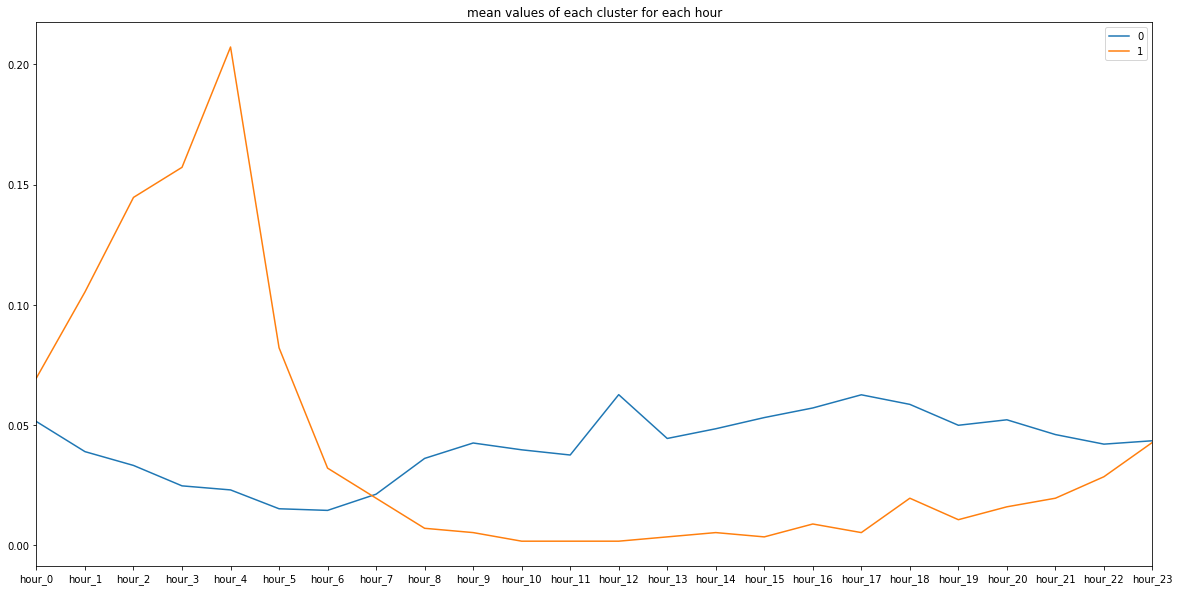

In [35]:
hr_mean.T.plot(figsize=[20,10],xticks=range(24),title='mean values of each cluster for each hour')
plt.legend(loc='upper right')
plt.show()

In [39]:
cluster0 = crime[crime['labels'] == 1]
cluster0

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,labels
INTOXICATED & IMPAIRED DRIVING,0.069643,0.105357,0.144643,0.157143,0.207143,0.082143,0.032143,0.019643,0.007143,0.005357,...,0.003571,0.008929,0.005357,0.019643,0.010714,0.016071,0.019643,0.028571,0.042857,1


In [40]:
cluster0['labels'] = 2

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [41]:
cluster1 = crime[crime['labels'] == 0].iloc[:,:-1]

In [42]:
from sklearn.metrics import silhouette_score
x = cluster1
score = {}
for i in range(2,10):
    km = KMeans(random_state=999,n_clusters=i)
    res=km.fit(x)
    labels = res.labels_
    score[i] = silhouette_score(x, labels)
    print("For n_clusters = {},".format(i)+" the silhouette_score is : {}".format(score[i]))
print('The choosen number of clusters is {}'.format([n for n in score.keys() if score[n]==max(score.values())][0]))

For n_clusters = 2, the silhouette_score is : 0.499809542521
For n_clusters = 3, the silhouette_score is : 0.287726312722
For n_clusters = 4, the silhouette_score is : 0.297905721019
For n_clusters = 5, the silhouette_score is : 0.234649672253
For n_clusters = 6, the silhouette_score is : 0.259932686988
For n_clusters = 7, the silhouette_score is : 0.239102099432
For n_clusters = 8, the silhouette_score is : 0.228862316135
For n_clusters = 9, the silhouette_score is : 0.182971558406
The choosen number of clusters is 2


In [43]:
from sklearn.cluster import KMeans
km = KMeans(random_state=999,n_clusters=2)
res=km.fit(x)

print 'Cluster assignments:',res.labels_
print '\nCluster centers:\n',res.cluster_centers_
print '\nSum of squared errors:',res.inertia_

Cluster assignments: [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0]

Cluster centers:
[[ 0.05056348  0.04112779  0.03509216  0.02687179  0.02505872  0.01616719
   0.01573484  0.02178775  0.03403684  0.03888749  0.03688644  0.03792032
   0.04826465  0.0437749   0.04664758  0.05211599  0.05753217  0.06460618
   0.06063884  0.05190636  0.05437856  0.04967053  0.04399434  0.04633509]
 [ 0.0593593   0.02089228  0.01770059  0.00696409  0.00638337  0.00754481
   0.0047898   0.01726846  0.05443     0.07401225  0.06414455  0.03482956
   0.18516783  0.05035586  0.06428405  0.06196571  0.05384018  0.0457101
   0.04164506  0.03337548  0.03395166  0.01567489  0.02611876  0.01959134]]

Sum of squared errors: 0.0709686754171


In [44]:
cluster1['labels'] = res.labels_
cluster1.head()

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,labels
ROBBERY,0.063963,0.056162,0.061622,0.037441,0.054602,0.035881,0.021061,0.017161,0.019501,0.022621,...,0.046022,0.046022,0.046022,0.046802,0.042122,0.052262,0.060062,0.054602,0.046802,0
PETIT LARCENY,0.026836,0.021767,0.021171,0.015108,0.013716,0.013915,0.012722,0.021370,0.031806,0.039857,...,0.071265,0.069774,0.073054,0.065600,0.054170,0.045721,0.041547,0.034589,0.028924,0
CRIMINAL MISCHIEF & RELATED OF,0.140315,0.028353,0.029594,0.024834,0.020695,0.014280,0.010141,0.021937,0.027318,0.028353,...,0.058568,0.051531,0.053187,0.052152,0.055257,0.052980,0.046151,0.041391,0.038493,0
ASSAULT 3 & RELATED OFFENSES,0.045302,0.055791,0.047757,0.049989,0.039946,0.020085,0.015398,0.020085,0.025664,0.027449,...,0.047088,0.050658,0.045749,0.053783,0.048650,0.055791,0.061147,0.055568,0.051105,0
FELONY ASSAULT,0.053232,0.051331,0.056401,0.055767,0.050697,0.022180,0.018378,0.021546,0.022814,0.034854,...,0.041191,0.051331,0.053866,0.058935,0.046895,0.050697,0.051965,0.045627,0.056401,0


In [45]:
cluster1[cluster1['labels'] == 0]

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,labels
ROBBERY,0.063963,0.056162,0.061622,0.037441,0.054602,0.035881,0.021061,0.017161,0.019501,0.022621,...,0.046022,0.046022,0.046022,0.046802,0.042122,0.052262,0.060062,0.054602,0.046802,0
PETIT LARCENY,0.026836,0.021767,0.021171,0.015108,0.013716,0.013915,0.012722,0.021370,0.031806,0.039857,...,0.071265,0.069774,0.073054,0.065600,0.054170,0.045721,0.041547,0.034589,0.028924,0
CRIMINAL MISCHIEF & RELATED OF,0.140315,0.028353,0.029594,0.024834,0.020695,0.014280,0.010141,0.021937,0.027318,0.028353,...,0.058568,0.051531,0.053187,0.052152,0.055257,0.052980,0.046151,0.041391,0.038493,0
ASSAULT 3 & RELATED OFFENSES,0.045302,0.055791,0.047757,0.049989,0.039946,0.020085,0.015398,0.020085,0.025664,0.027449,...,0.047088,0.050658,0.045749,0.053783,0.048650,0.055791,0.061147,0.055568,0.051105,0
FELONY ASSAULT,0.053232,0.051331,0.056401,0.055767,0.050697,0.022180,0.018378,0.021546,0.022814,0.034854,...,0.041191,0.051331,0.053866,0.058935,0.046895,0.050697,0.051965,0.045627,0.056401,0
GRAND LARCENY,0.051025,0.033858,0.025910,0.017326,0.011286,0.005881,0.012240,0.016849,0.041329,0.052933,...,0.061993,0.061993,0.061040,0.059768,0.052456,0.048164,0.035765,0.029725,0.031474,0
DANGEROUS DRUGS,0.057632,0.053998,0.033749,0.025441,0.016615,0.002596,0.012461,0.007788,0.009865,0.020249,...,0.063863,0.093977,0.105919,0.093458,0.068536,0.056594,0.057113,0.044652,0.052960,0
HARRASSMENT 2,0.027199,0.024101,0.017387,0.013944,0.011362,0.012395,0.013083,0.023756,0.045619,0.050267,...,0.066276,0.057325,0.062489,0.061112,0.051988,0.056636,0.046135,0.042004,0.034946,0
DANGEROUS WEAPONS,0.056579,0.064474,0.061842,0.035526,0.032895,0.009211,0.021053,0.006579,0.019737,0.019737,...,0.038158,0.052632,0.065789,0.064474,0.048684,0.051316,0.055263,0.048684,0.077632,0
GRAND LARCENY OF MOTOR VEHICLE,0.047619,0.056022,0.039216,0.025210,0.019608,0.039216,0.022409,0.028011,0.036415,0.019608,...,0.039216,0.044818,0.072829,0.056022,0.033613,0.064426,0.064426,0.056022,0.084034,0


In [46]:
cluster1[cluster1['labels'] == 1]

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,labels
FRAUDS,0.044386,0.031332,0.026110,0.010444,0.010444,0.010444,0.002611,0.018277,0.028721,0.067885,...,0.060052,0.049608,0.049608,0.049608,0.036554,0.046997,0.010444,0.031332,0.018277,1
THEFT-FRAUD,0.074332,0.010453,0.009292,0.003484,0.002323,0.004646,0.006969,0.016260,0.080139,0.080139,...,0.063879,0.058072,0.041812,0.033682,0.030197,0.020906,0.020906,0.020906,0.020906,1


In [47]:
cluster = pd.concat([cluster1,cluster0])

In [48]:
hr_mean = pd.DataFrame({'hour_{}'.format(x):0 for x in range(0,24)},index=[0,1,2])
hr_mean.columns = sorted(hr_mean.columns,key=lambda x: int(x[5:]))

In [49]:
for i in range(0,3):
    hr_mean.iloc[i] = cluster[cluster['labels']==i].mean(0)

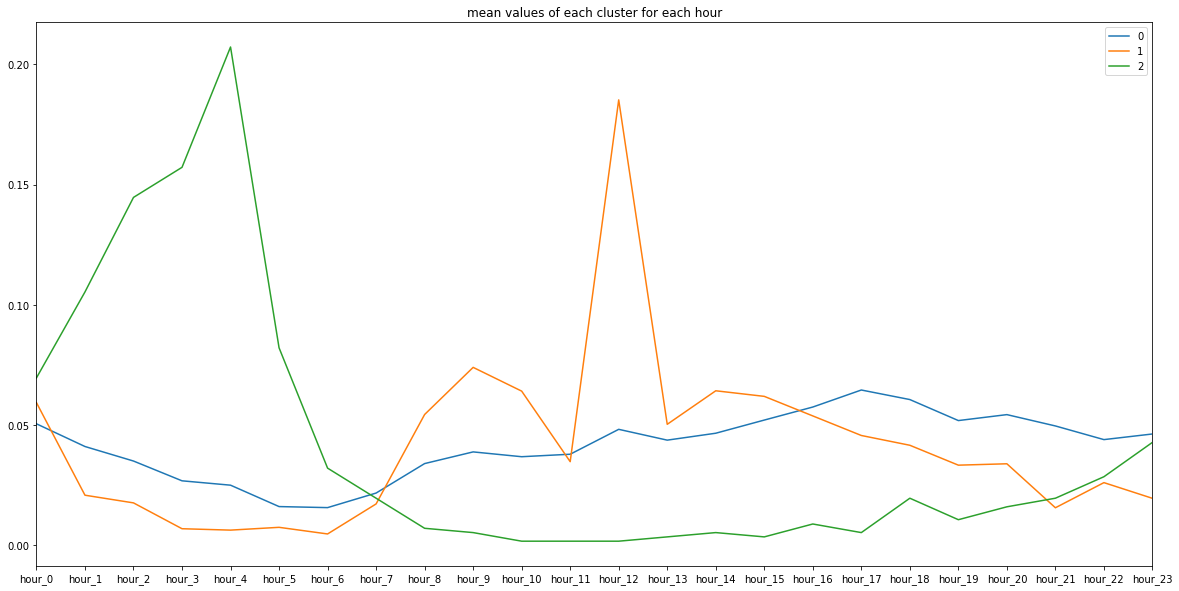

In [50]:
from matplotlib import pyplot as plt
hr_mean.T.plot(figsize=[20,10],xticks=range(24),title='mean values of each cluster for each hour')
plt.show()

## Calculate percent of weekday

In [65]:
df1 = df[['crime','weekday']]
df1.head()

,crime,weekday
0,ROBBERY,SATURDAY
1,PETIT LARCENY,SATURDAY
2,PETIT LARCENY,SATURDAY
3,CRIMINAL MISCHIEF & RELATED OF,SATURDAY
4,ASSAULT 3 & RELATED OFFENSES,SATURDAY


In [66]:
merge =pd.DataFrame([['SUNDAY',7],['MONDAY',1],['TUESDAY',2],['WEDNESDAY',3],['THURSDAY',4],['FRIDAY',5],['SATURDAY',6]],columns=['weekday', 'day'])
merge.day = merge.day.astype(int)
merge.day = merge.day.astype(str)
merge.head()

,weekday,day
0,SUNDAY,7
1,MONDAY,1
2,TUESDAY,2
3,WEDNESDAY,3
4,THURSDAY,4


In [67]:
df1 = pd.merge(merge,df1,on='weekday')
df1 = df1[['crime','day']]
df1.head()

,crime,day
0,GRAND LARCENY,7
1,CRIMINAL MISCHIEF & RELATED OF,7
2,CRIMINAL MISCHIEF & RELATED OF,7
3,GRAND LARCENY,7
4,GRAND LARCENY OF MOTOR VEHICLE,7


In [68]:
data1 = df1[df1['crime'] == df1['crime'].unique()[0]].groupby('day').count().T
data1.index = range(0,1)
data1 = data1[['7','1','2','3','4','5','6']]
data1.head()

day,7,1,2,3,4,5,6
0,802,845,900,912,925,983,924


In [69]:
for i in range(1,len(df1['crime'].unique())):
    DATA = df1[df1['crime'] == df1['crime'].unique()[i]].groupby('day').count().T
    DATA.index = range(i,i+1)
    data1 = pd.concat([data1,DATA])

In [70]:
data1.index = df1['crime'].unique()

In [71]:
data1['sum'] = data1[data1.columns[0]]

In [72]:
for i in range(20):
    data1.iloc[i,-1] = data1.iloc[i,:-1].sum()
data1

day,1,2,3,4,5,6,7,sum
GRAND LARCENY,845,900,912,925,983,924,802,6291
CRIMINAL MISCHIEF & RELATED OF,631,734,769,758,743,663,534,4832
GRAND LARCENY OF MOTOR VEHICLE,59,44,34,54,65,42,59,357
THEFT-FRAUD,152,117,141,138,160,81,72,861
OFF. AGNST PUB ORD SENSBLTY &,276,275,294,315,272,232,210,1874
HARRASSMENT 2,805,900,952,857,811,727,757,5809
PETIT LARCENY,1428,1497,1532,1469,1528,1416,1191,10061
INTOXICATED & IMPAIRED DRIVING,75,36,32,51,68,154,144,560
ASSAULT 3 & RELATED OFFENSES,566,597,598,587,631,722,780,4481
ROBBERY,211,163,169,164,188,177,210,1282


In [73]:
for i in data1.columns[:-1]:
    data1[i] = data1[i] / data1['sum']
data1

day,1,2,3,4,5,6,7,sum
GRAND LARCENY,0.134319,0.143062,0.144969,0.147035,0.156255,0.146876,0.127484,6291
CRIMINAL MISCHIEF & RELATED OF,0.130588,0.151904,0.159147,0.156871,0.153767,0.137210,0.110513,4832
GRAND LARCENY OF MOTOR VEHICLE,0.165266,0.123249,0.095238,0.151261,0.182073,0.117647,0.165266,357
THEFT-FRAUD,0.176539,0.135889,0.163763,0.160279,0.185830,0.094077,0.083624,861
OFF. AGNST PUB ORD SENSBLTY &,0.147279,0.146745,0.156884,0.168090,0.145144,0.123799,0.112060,1874
HARRASSMENT 2,0.138578,0.154932,0.163884,0.147530,0.139611,0.125151,0.130315,5809
PETIT LARCENY,0.141934,0.148792,0.152271,0.146009,0.151874,0.140741,0.118378,10061
INTOXICATED & IMPAIRED DRIVING,0.133929,0.064286,0.057143,0.091071,0.121429,0.275000,0.257143,560
ASSAULT 3 & RELATED OFFENSES,0.126311,0.133229,0.133452,0.130998,0.140817,0.161125,0.174068,4481
ROBBERY,0.164587,0.127145,0.131825,0.127925,0.146646,0.138066,0.163807,1282


In [74]:
data1 = data1.iloc[:,:-1]

weekday = data1.copy()

weekday.columns = [['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]

weekday.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
GRAND LARCENY,0.134319,0.143062,0.144969,0.147035,0.156255,0.146876,0.127484
CRIMINAL MISCHIEF & RELATED OF,0.130588,0.151904,0.159147,0.156871,0.153767,0.137210,0.110513
GRAND LARCENY OF MOTOR VEHICLE,0.165266,0.123249,0.095238,0.151261,0.182073,0.117647,0.165266
THEFT-FRAUD,0.176539,0.135889,0.163763,0.160279,0.185830,0.094077,0.083624
OFF. AGNST PUB ORD SENSBLTY &,0.147279,0.146745,0.156884,0.168090,0.145144,0.123799,0.112060


In [75]:
weekday = weekday.fillna(0)

In [76]:
from sklearn.metrics import silhouette_score
x = weekday
score = {}
for i in range(2,10):
    km = KMeans(random_state=999,n_clusters=i)
    res=km.fit(x)
    labels = res.labels_
    score[i] = silhouette_score(x, labels)
    print("For n_clusters = {},".format(i)+" the silhouette_score is : {}".format(score[i]))
print('The choosen number of clusters is {}'.format([n for n in score.keys() if score[n]==max(score.values())][0]))

For n_clusters = 2, the silhouette_score is : 0.625146493164
For n_clusters = 3, the silhouette_score is : 0.388693324452
For n_clusters = 4, the silhouette_score is : 0.299177834874
For n_clusters = 5, the silhouette_score is : 0.301498103918
For n_clusters = 6, the silhouette_score is : 0.304337905448
For n_clusters = 7, the silhouette_score is : 0.311134949385
For n_clusters = 8, the silhouette_score is : 0.289770534399
For n_clusters = 9, the silhouette_score is : 0.256709880025
The choosen number of clusters is 2


In [77]:
km = KMeans(random_state=999,n_clusters=2)
res=km.fit(weekday)

print 'Cluster assignments:',res.labels_
print '\nCluster centers:\n',res.cluster_centers_
print '\nSum of squared errors:',res.inertia_

Cluster assignments: [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]

Cluster centers:
[[ 0.13275032  0.14362711  0.15008676  0.15063757  0.16343936  0.1374005
   0.12205838]
 [ 0.13392857  0.06428571  0.05714286  0.09107143  0.12142857  0.275
   0.25714286]]

Sum of squared errors: 0.0715398682317


In [78]:
weekday['labels'] = res.labels_
weekday.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,labels
GRAND LARCENY,0.134319,0.143062,0.144969,0.147035,0.156255,0.146876,0.127484,0
CRIMINAL MISCHIEF & RELATED OF,0.130588,0.151904,0.159147,0.156871,0.153767,0.137210,0.110513,0
GRAND LARCENY OF MOTOR VEHICLE,0.165266,0.123249,0.095238,0.151261,0.182073,0.117647,0.165266,0
THEFT-FRAUD,0.176539,0.135889,0.163763,0.160279,0.185830,0.094077,0.083624,0
OFF. AGNST PUB ORD SENSBLTY &,0.147279,0.146745,0.156884,0.168090,0.145144,0.123799,0.112060,0


In [79]:
weekday[weekday['labels'] == 1] 

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,labels
INTOXICATED & IMPAIRED DRIVING,0.133929,0.064286,0.057143,0.091071,0.121429,0.275,0.257143,1


In [80]:
cluster0 = weekday[weekday['labels'] == 1]

In [81]:
cluster0['labels'] = 2

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [82]:
cluster0.index = ['cluster2']

In [83]:
cluster0 = cluster0.iloc[:,:-1]
cluster0

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
cluster2,0.133929,0.064286,0.057143,0.091071,0.121429,0.275,0.257143


In [84]:
cluster1 = weekday[weekday['labels'] == 0].iloc[:,:-1]

In [85]:
from sklearn.metrics import silhouette_score
x = cluster1
score = {}
for i in range(2,10):
    km = KMeans(random_state=999,n_clusters=i)
    res=km.fit(x)
    labels = res.labels_
    score[i] = silhouette_score(x, labels)
    print("For n_clusters = {},".format(i)+" the silhouette_score is : {}".format(score[i]))
print('The choosen number of clusters is {}'.format([n for n in score.keys() if score[n]==max(score.values())][0]))

For n_clusters = 2, the silhouette_score is : 0.409150867844
For n_clusters = 3, the silhouette_score is : 0.314924036709
For n_clusters = 4, the silhouette_score is : 0.332945058905
For n_clusters = 5, the silhouette_score is : 0.338443634529
For n_clusters = 6, the silhouette_score is : 0.327510473037
For n_clusters = 7, the silhouette_score is : 0.305021615156
For n_clusters = 8, the silhouette_score is : 0.270220926342
For n_clusters = 9, the silhouette_score is : 0.242565553548
The choosen number of clusters is 2


In [86]:
from sklearn.cluster import KMeans
km = KMeans(random_state=999,n_clusters=2)
res=km.fit(x)

print 'Cluster assignments:',res.labels_
print '\nCluster centers:\n',res.cluster_centers_
print '\nSum of squared errors:',res.inertia_

Cluster assignments: [0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1]

Cluster centers:
[[ 0.14353071  0.14300561  0.1450194   0.14088102  0.15700802  0.13727498
   0.13328025]
 [ 0.09232386  0.14595773  0.16908935  0.18722462  0.18755688  0.13787121
   0.07997635]]

Sum of squared errors: 0.0426993085063


In [87]:
cluster1['labels'] = res.labels_
cluster1.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,labels
GRAND LARCENY,0.134319,0.143062,0.144969,0.147035,0.156255,0.146876,0.127484,0
CRIMINAL MISCHIEF & RELATED OF,0.130588,0.151904,0.159147,0.156871,0.153767,0.137210,0.110513,0
GRAND LARCENY OF MOTOR VEHICLE,0.165266,0.123249,0.095238,0.151261,0.182073,0.117647,0.165266,0
THEFT-FRAUD,0.176539,0.135889,0.163763,0.160279,0.185830,0.094077,0.083624,0
OFF. AGNST PUB ORD SENSBLTY &,0.147279,0.146745,0.156884,0.168090,0.145144,0.123799,0.112060,0


In [91]:
cluster1[cluster1['labels'] == 0]

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,labels
GRAND LARCENY,0.134319,0.143062,0.144969,0.147035,0.156255,0.146876,0.127484,0
CRIMINAL MISCHIEF & RELATED OF,0.130588,0.151904,0.159147,0.156871,0.153767,0.137210,0.110513,0
GRAND LARCENY OF MOTOR VEHICLE,0.165266,0.123249,0.095238,0.151261,0.182073,0.117647,0.165266,0
THEFT-FRAUD,0.176539,0.135889,0.163763,0.160279,0.185830,0.094077,0.083624,0
OFF. AGNST PUB ORD SENSBLTY &,0.147279,0.146745,0.156884,0.168090,0.145144,0.123799,0.112060,0
HARRASSMENT 2,0.138578,0.154932,0.163884,0.147530,0.139611,0.125151,0.130315,0
PETIT LARCENY,0.141934,0.148792,0.152271,0.146009,0.151874,0.140741,0.118378,0
ASSAULT 3 & RELATED OFFENSES,0.126311,0.133229,0.133452,0.130998,0.140817,0.161125,0.174068,0
ROBBERY,0.164587,0.127145,0.131825,0.127925,0.146646,0.138066,0.163807,0
OFFENSES AGAINST PUBLIC ADMINI,0.126061,0.145455,0.143030,0.130909,0.166061,0.138182,0.150303,0


In [93]:
cluster1[cluster1['labels'] == 1]

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,labels
DANGEROUS WEAPONS,0.085526,0.138158,0.159211,0.172368,0.177632,0.176316,0.090789,1
FRAUDS,0.125326,0.174935,0.154047,0.180157,0.190601,0.120104,0.054830,1
DANGEROUS DRUGS,0.060228,0.125649,0.188993,0.184320,0.190031,0.141225,0.109553,1
FORGERY,0.098214,0.145089,0.174107,0.212054,0.191964,0.113839,0.064732,1


In [88]:
day_mean = pd.DataFrame({x:0 for x in range(7)},index=['cluster0','cluster1'])
day_mean.columns = cluster1.columns[:-1]
for i in range(2):
     day_mean.iloc[i] = cluster1[cluster1['labels']==i].iloc[:,:-1].mean()
day_mean.head()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
cluster0,0.143531,0.143006,0.145019,0.140881,0.157008,0.137275,0.133280
cluster1,0.092324,0.145958,0.169089,0.187225,0.187557,0.137871,0.079976


In [89]:
day_mean = pd.concat([day_mean,cluster0])
day_mean

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
cluster0,0.143531,0.143006,0.145019,0.140881,0.157008,0.137275,0.133280
cluster1,0.092324,0.145958,0.169089,0.187225,0.187557,0.137871,0.079976
cluster2,0.133929,0.064286,0.057143,0.091071,0.121429,0.275000,0.257143


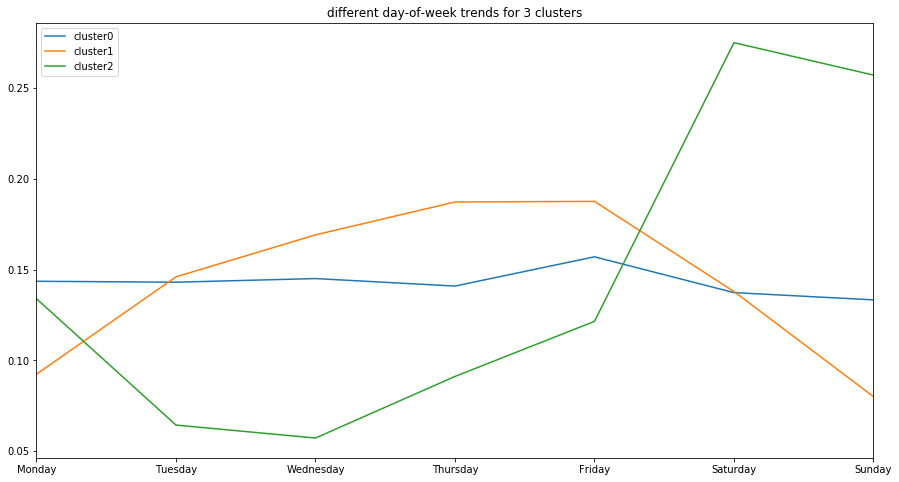

In [90]:
day_mean.T.plot(figsize=[15,8],title='different day-of-week trends for 3 clusters')
plt.show()